Class Distribution:
Class
0    225419
1       415
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45084
           1       0.80      0.64      0.71        83

    accuracy                           1.00     45167
   macro avg       0.90      0.82      0.86     45167
weighted avg       1.00      1.00      1.00     45167


Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45084
           1       0.97      0.84      0.90        83

    accuracy                           1.00     45167
   macro avg       0.99      0.92      0.95     45167
weighted avg       1.00      1.00      1.00     45167



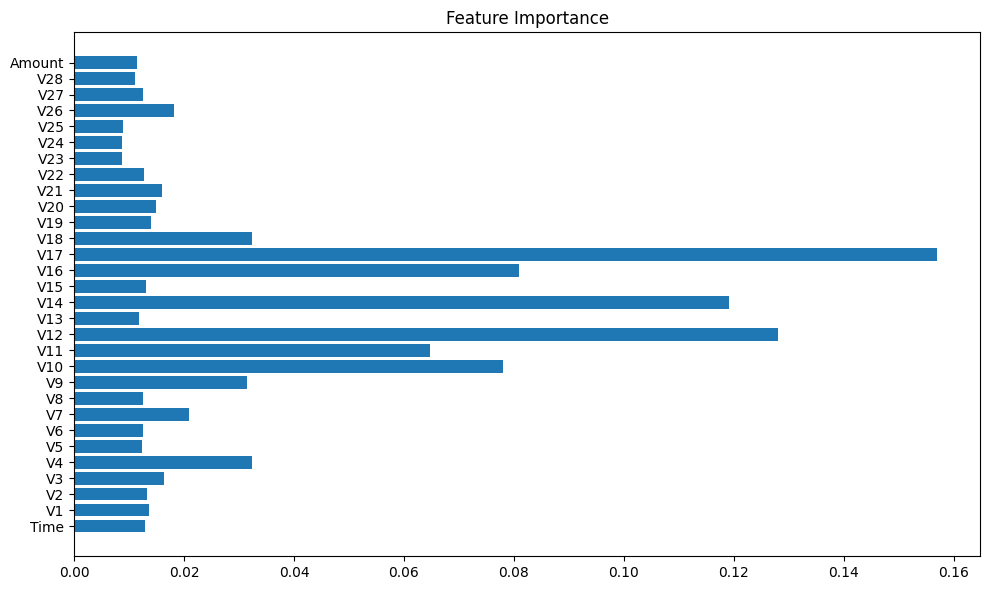


Model saved as random_forest_fraud_model.pkl


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(
    "creditcard.csv",
    encoding="latin1",
    engine="python",
    on_bad_lines="skip"
)

data = data.dropna(subset=["Class"])

data["Class"] = data["Class"].astype(int)

print("Class Distribution:")
print(data["Class"].value_counts())

X = data.drop("Class", axis=1)
y = data["Class"]

scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("\nLogistic Regression Results")
print(classification_report(y_test, log_pred))

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Results")
print(classification_report(y_test, rf_pred))

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

joblib.dump(rf_model, "random_forest_fraud_model.pkl")
print("\nModel saved as random_forest_fraud_model.pkl")
